#### The purpose of this is to generate expected output from our test case files and compare with the results of our own convex hull code

Imported ConvexHull structure from scipy to compare with ours ↓

In [1]:
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

#### Python function to construct and plot convex hull given a file with the following format: 
(x1,y1)
(x2,y2)
(x3,y3)...

In [2]:
def constructHull(file_name):
    with open(file_name, 'r') as file:
        lines = file.readlines()

    # Parse values
    x_values = []
    y_values = []

    for line in lines:
        x, y = map(int, line[line.index('(') + 1:line.index(')')].split(','))
        x_values.append(x)
        y_values.append(y)
        
        
   
    points = list(zip(x_values, y_values))
        
    try:
        hull = ConvexHull(points)

        convex_hull_points = [points[i] for i in hull.vertices]
        print("Convex Hull Points:", convex_hull_points)

        # Plot the points
        plt.plot(*zip(*points), 'ro', label='All Points')

        # Plot the convex hull points
        plt.plot(*zip(*[points[i] for i in hull.vertices]), 'bo', label='Convex Hull Points')

        # Plot the convex hull edges
        for simplex in hull.simplices:
            plt.plot([points[i][0] for i in simplex] + [points[simplex[0]][0]],
                        [points[i][1] for i in simplex] + [points[simplex[0]][1]], 'k-')

        plt.title('Convex Hull Visualization')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.legend()
        plt.show()
            
    except Exception as e:
        print("Cannot construct convex hull. Plotting original points.")

        # Plot the points without attempting to compute the convex hull
        plt.plot(*zip(*points), 'ro', label='All Points')
        plt.title('Point Visualization')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.legend()
        plt.show()

# TEST CASE 1: 100 Points

## Expected output:

Convex Hull Points: [(-96, 77), (-100, -33), (-95, -98), (-15, -99), (69, -98), (98, -83), (100, 26), (84, 93), (77, 94), (25, 100), (-27, 99), (-93, 80)]


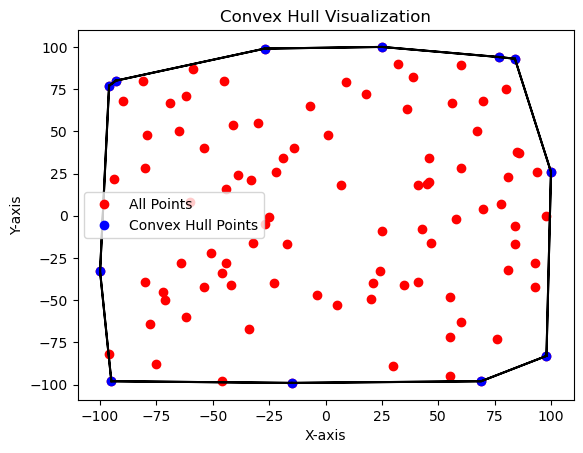

In [3]:
constructHull('test_cases/100_points.txt')

## Our output:

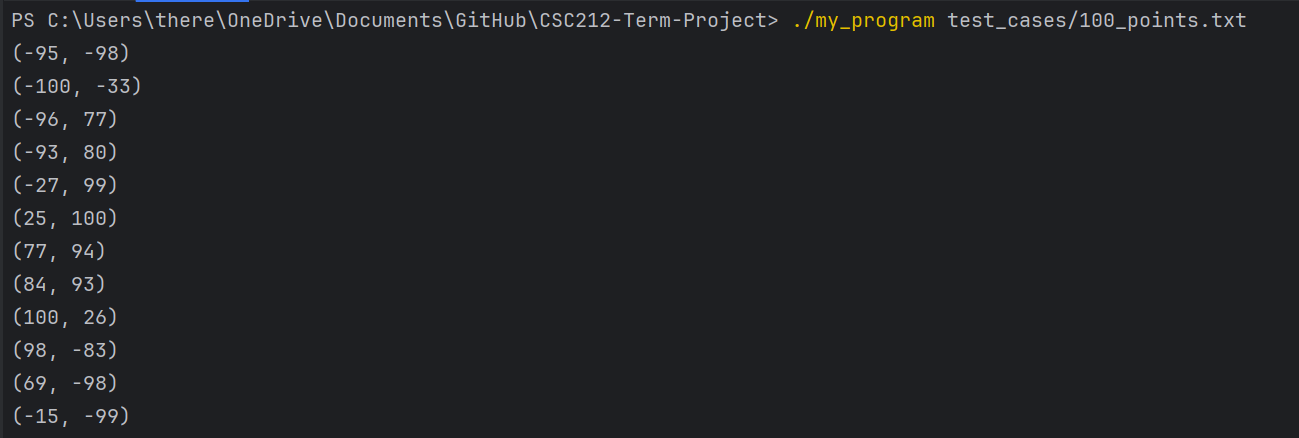

#### Our .dot file visualization(s):

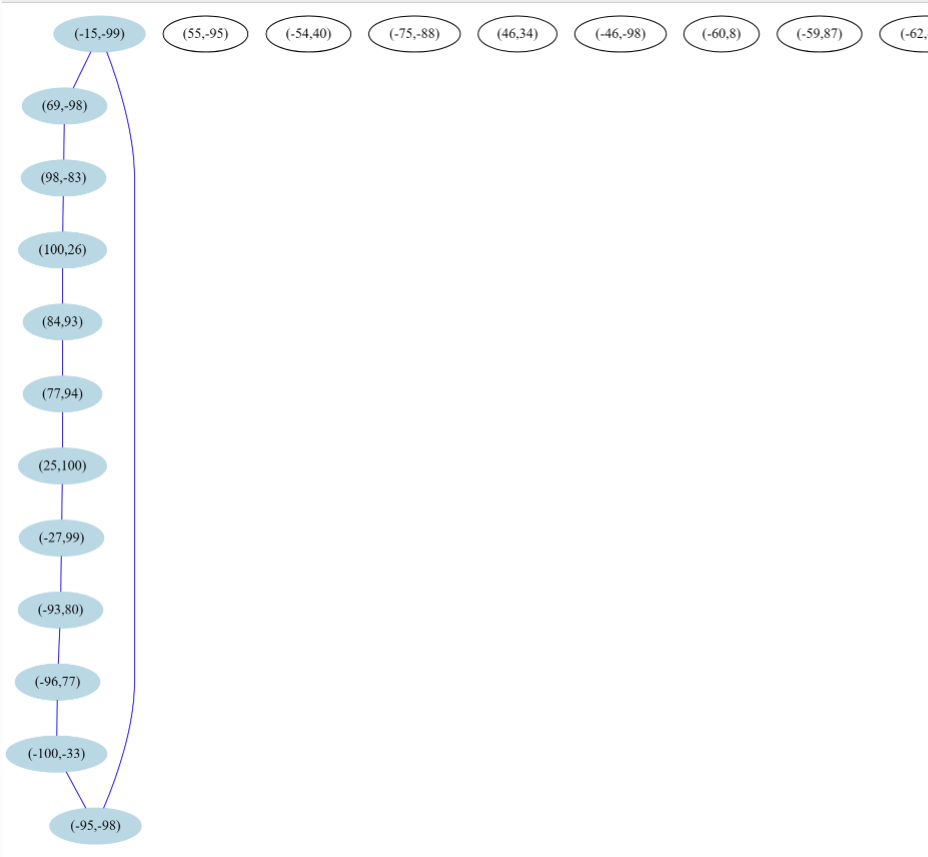

### Our results seem to match!

---

# TEST CASE 2: Empty File

## Expected output:

Cannot construct convex hull. Plotting original points.


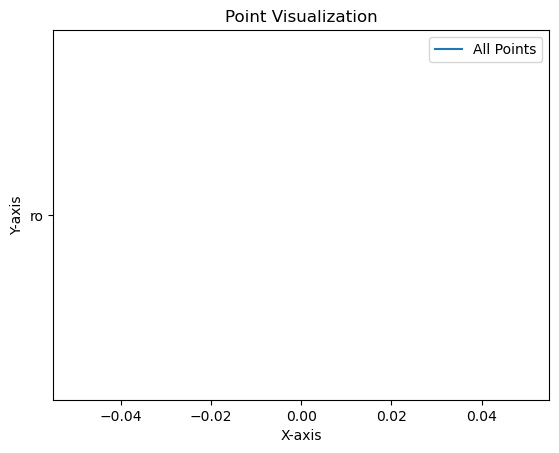

In [4]:
constructHull('test_cases/empty_test.txt')

## Our output:

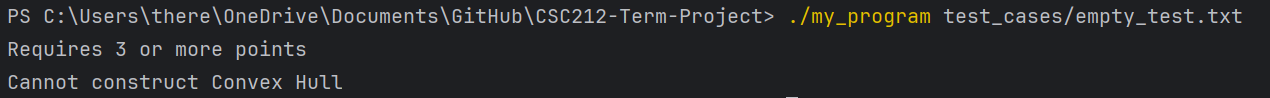

### Our results match!

---

# TEST CASE 3: Duplicate Points (more than 3 points)

## Expected output:

Cannot construct convex hull. Plotting original points.


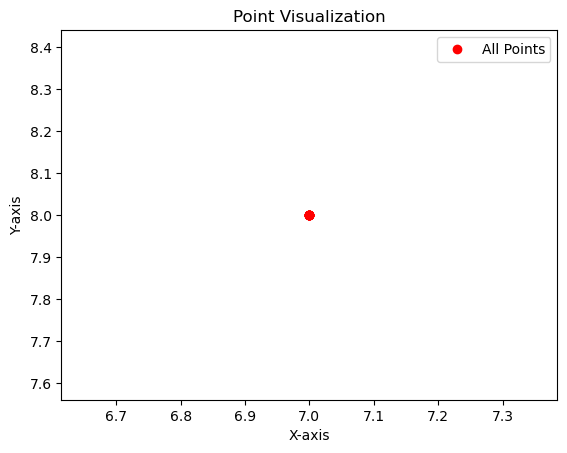

In [5]:
constructHull('test_cases/equal_points.txt')

## Our output:

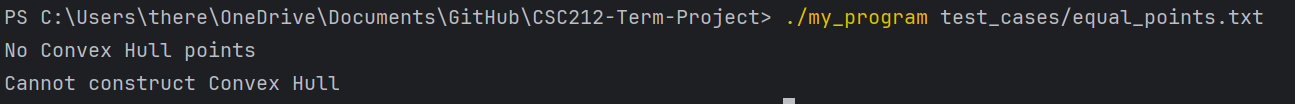

#### Our .dot file visualization(s):

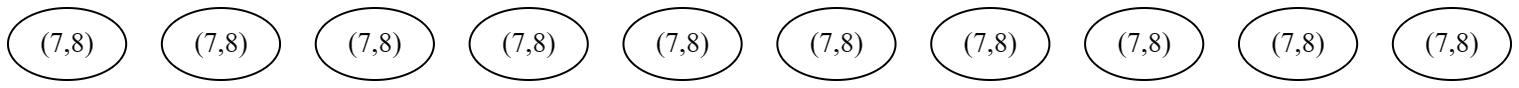

---

# TEST CASE 4: Four Poles With Duplicate Points 

## Expected output:

Convex Hull Points: [(1, 4), (1, 1), (4, 1), (4, 4)]


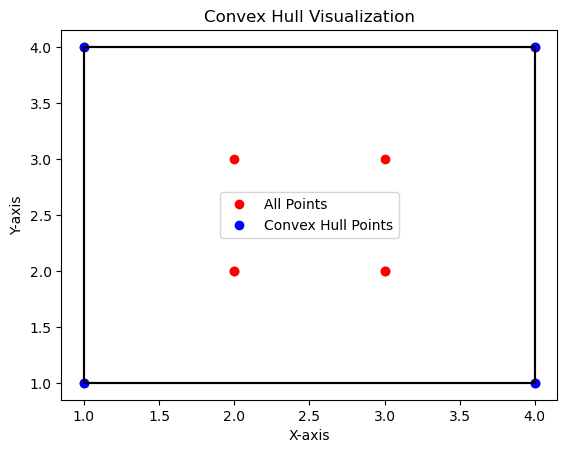

In [6]:
constructHull('test_cases/four_poles_with_duplicates.txt')

## Our output:

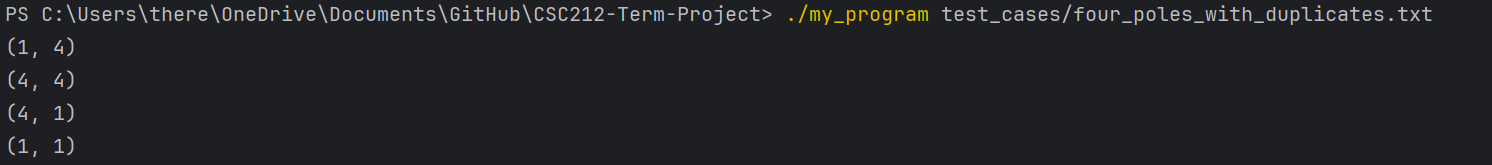

#### Our .dot file visualizations:

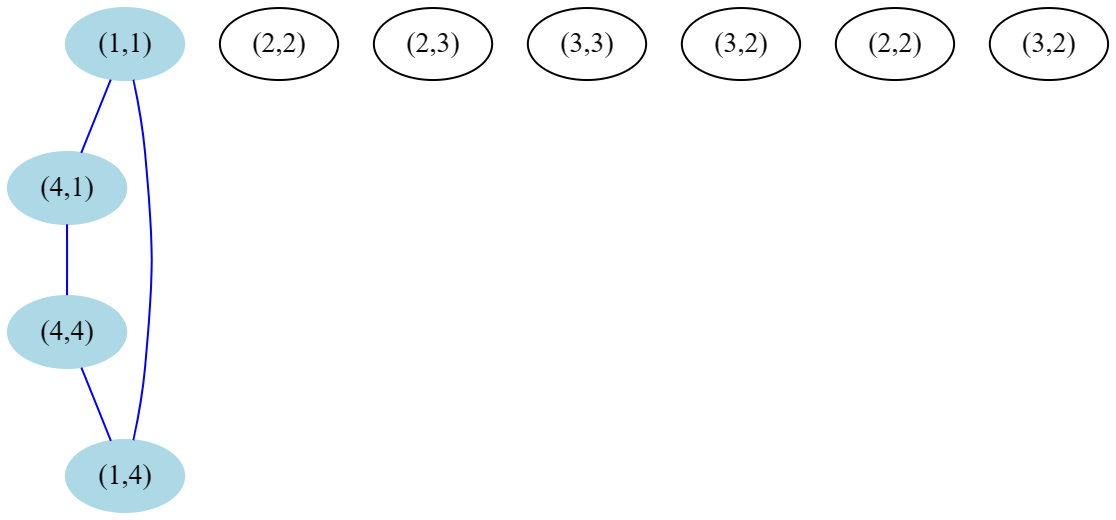

### Our results match!

---

# TEST CASE 5: Horizontal Line (same y values)

## Expected output:

Cannot construct convex hull. Plotting original points.


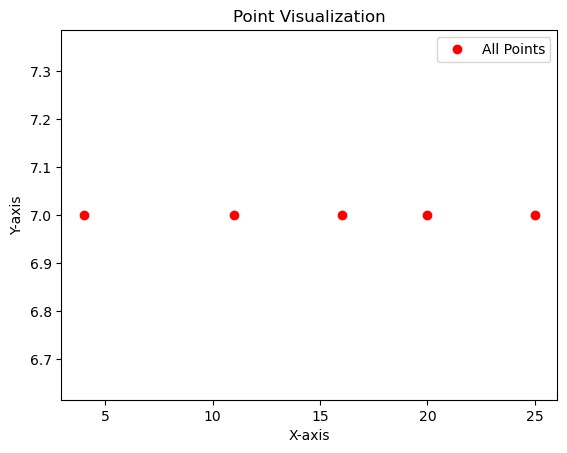

In [7]:
constructHull('test_cases/horizontal_line.txt')

## Our output:

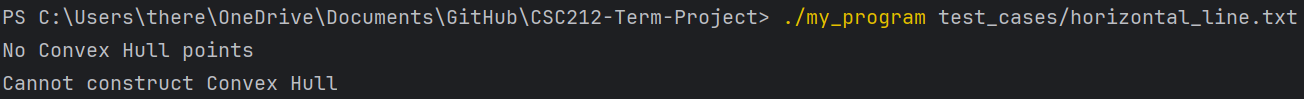

#### Our .dot file visualization(s):

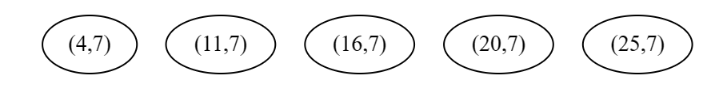

### Our results match!

---

# TEST CASE 6: One Point

## Expected output:

Cannot construct convex hull. Plotting original points.


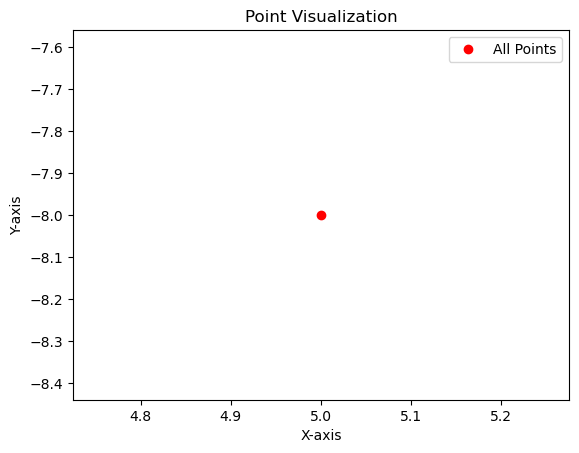

In [8]:
constructHull('test_cases/one_point.txt')

## Our output:

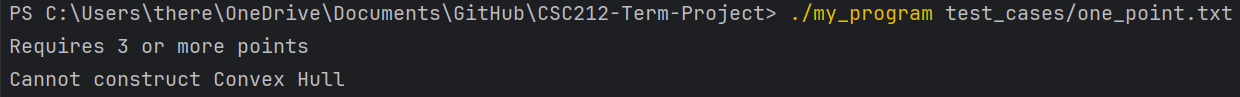

#### Our .dot file visualization(s):

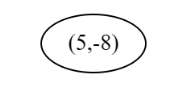

### Our results match!

---

# TEST CASE 7: Points On a Parabola

## Expected output:

Convex Hull Points: [(6, 19), (-6, 19), (-4, 9), (-2, 3), (0, 1), (2, 3), (4, 9)]


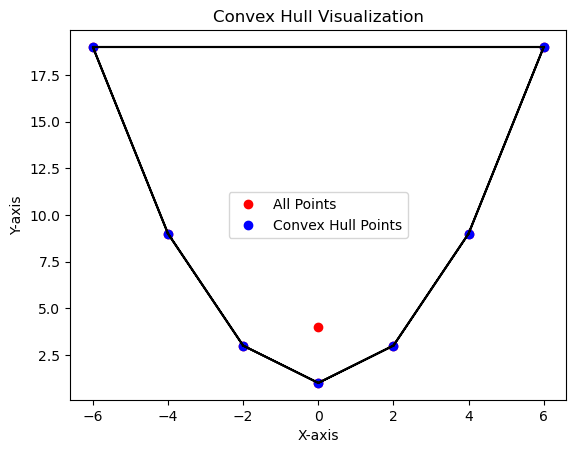

In [9]:
constructHull('test_cases/parabola_points.txt')

## Our output:

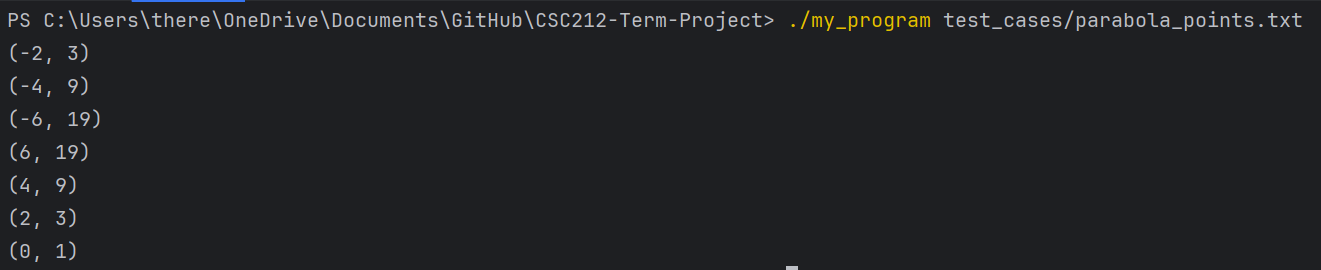

#### Our .dot file visualization(s):

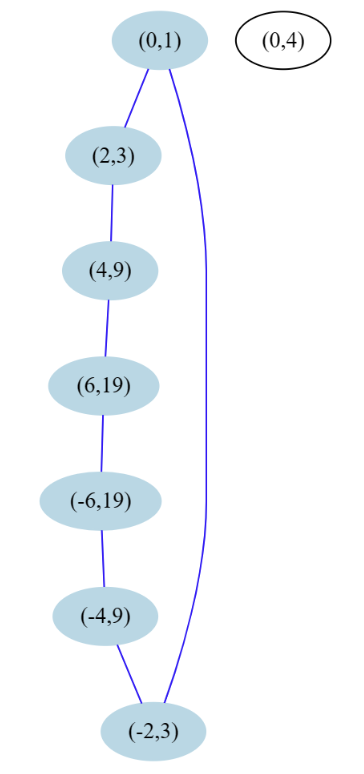

### Our results match!

---

# TEST CASE 8: Random Points In a Square

## Expected output:

Convex Hull Points: [(0, 100), (0, 0), (100, 0), (100, 100)]


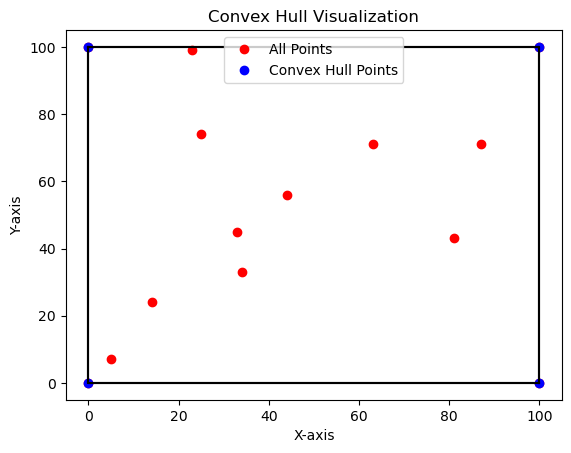

In [10]:
constructHull('test_cases/random_square_points.txt')

## Our output:

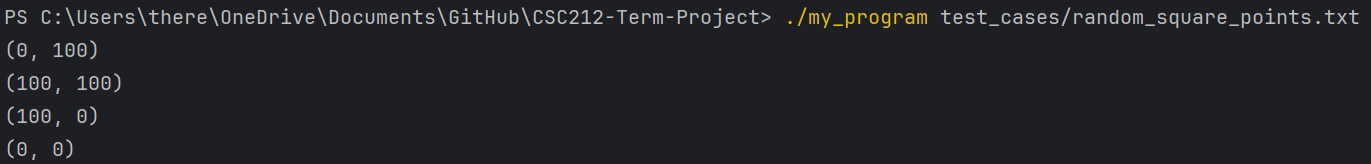

#### Our .dot file visualization(s):

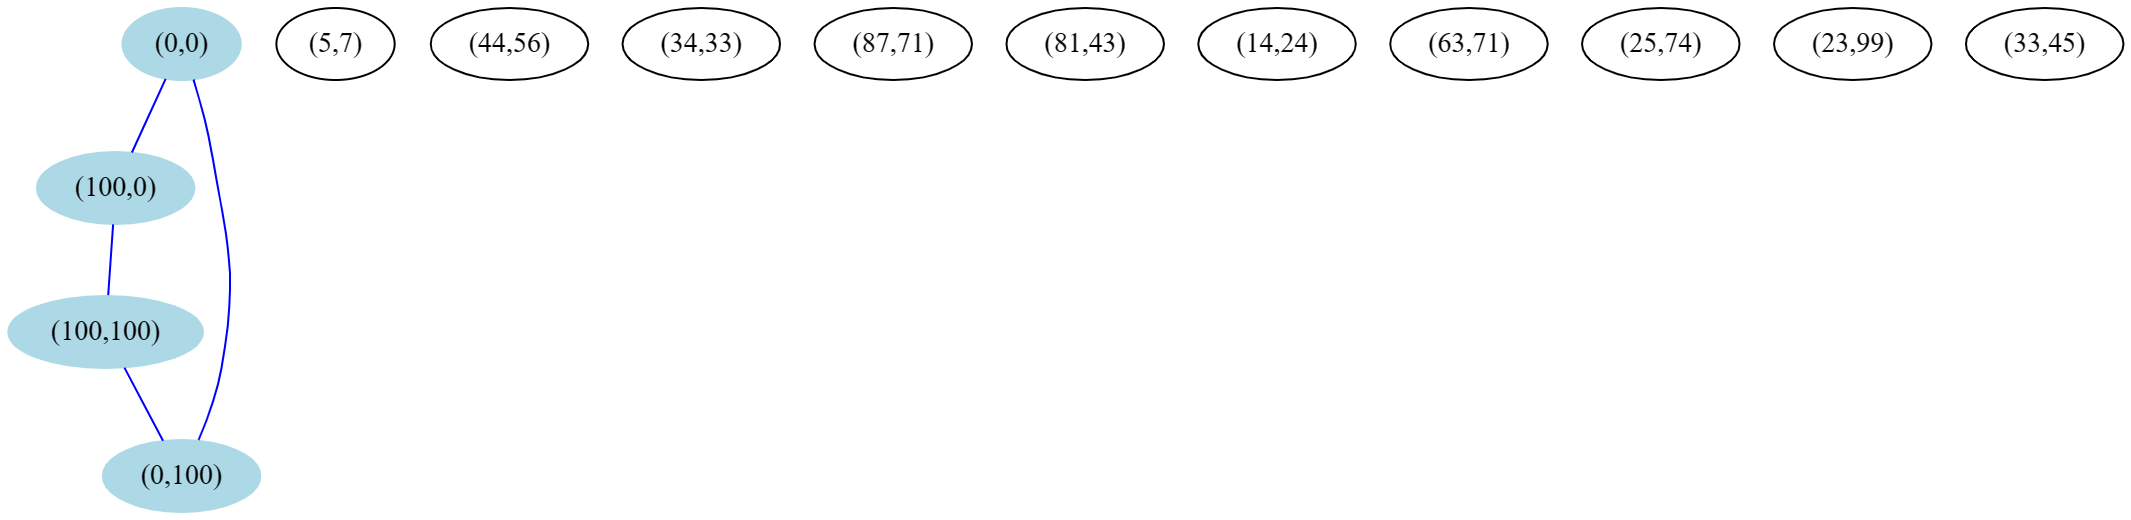

### Our results match!

---

# TEST CASE 9: Two Points

## Expected output:

Cannot construct convex hull. Plotting original points.


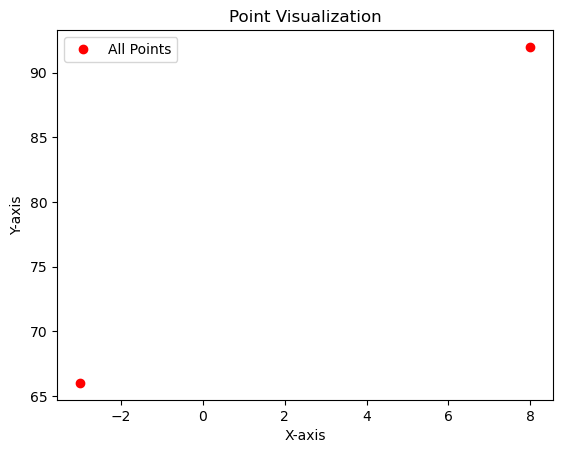

In [11]:
constructHull('test_cases/two_points.txt')

## Our output:

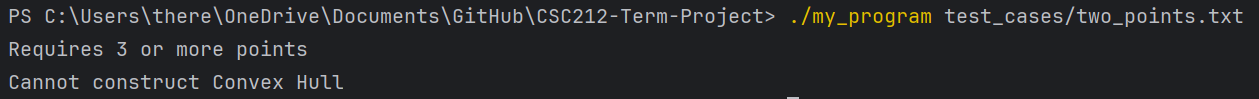

#### Our .dot file visualization(s):

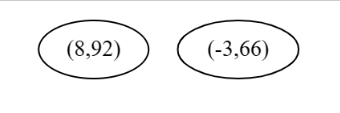

### Our results match!

---

# TEST CASE 10: Vertical Line (same x values)

## Expected output:

Cannot construct convex hull. Plotting original points.


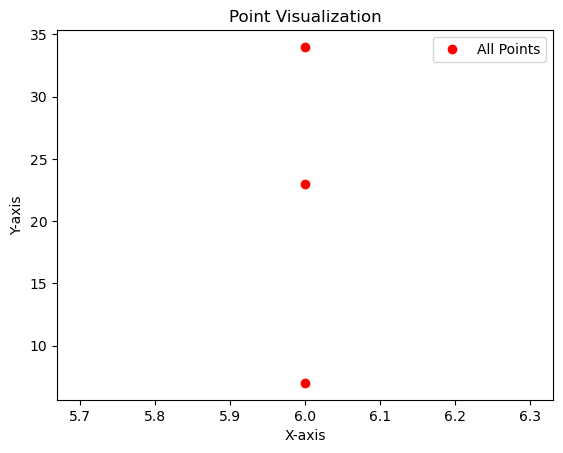

In [12]:
constructHull('test_cases/vertical_line.txt')

## Our output:

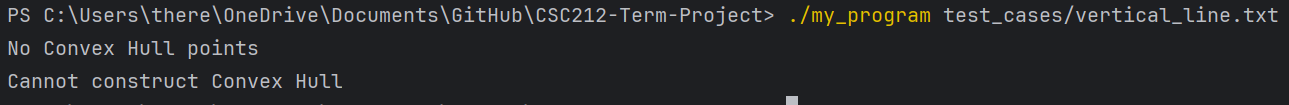

#### Our .dot file visualization(s):

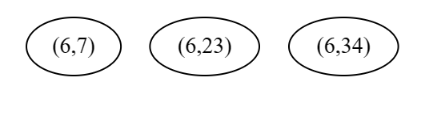

### Our results match!

---

# We passed our test cases!